## René Parlange, MSc
### 📚 Machine Learning Course, PhD in Computer Science
#### 🎓 Instructor: Juan Carlos Cuevas Tello, PhD
#### 🏛 Universidad Autónoma de San Luis Potosí (UASLP)

🔗 [GitHub Repository](https://github.com/parlange)

# Support Vector Machines (SVM) vs. Deep Neural Network (DNN)
### datasets: wine (UCI), iris (UCI) and reduced MNIST

Wine - SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

SVM Execution Time (Wine): 0.0022 seconds

Wine - Neural Network Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Neural Network Execution Time (Wine): 0.1873 seconds



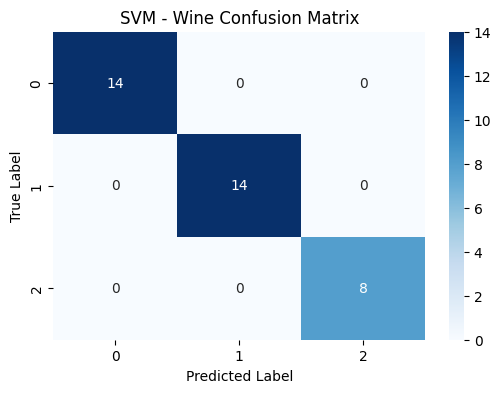

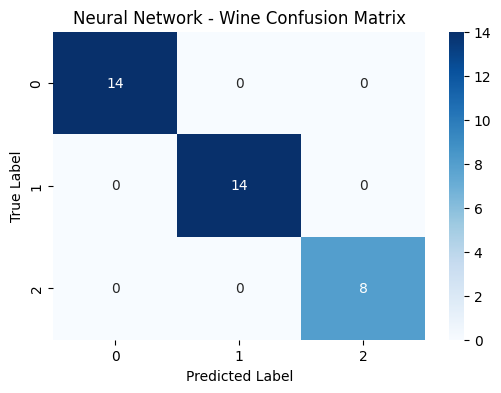

Iris - SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

SVM Execution Time (Iris): 0.0018 seconds

Iris - Neural Network Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Neural Network Execution Time (Iris): 0.2611 seconds



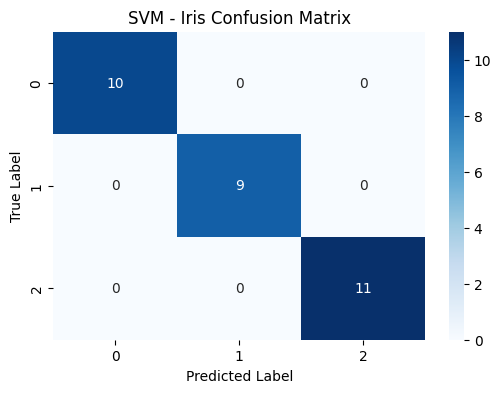

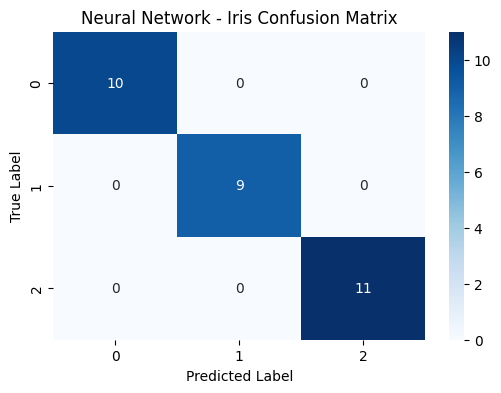

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


MNIST - SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.99      0.99      1600
           2       0.97      0.98      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.98      0.98      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.97      0.97      1503
           8       0.97      0.96      0.97      1357
           9       0.97      0.96      0.97      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000

SVM Execution Time (MNIST): 312.1974 seconds

MNIST - Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
     

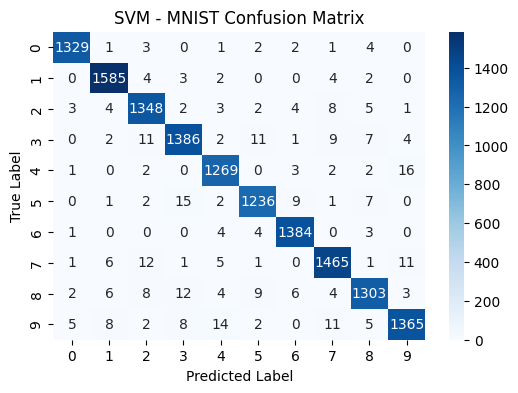

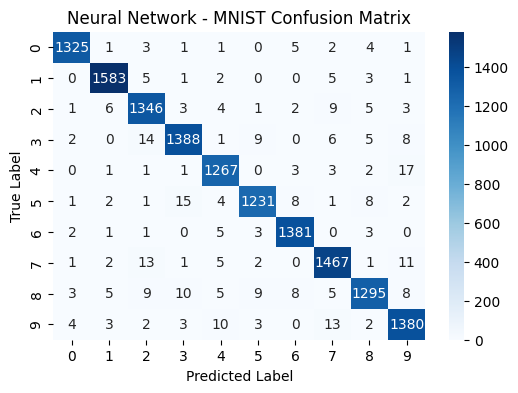

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import time
from sklearn.datasets import load_wine
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load and preprocess MNIST dataset
def load_mnist():
    mnist = fetch_openml('mnist_784', version=1)
    X = mnist.data.astype('float32') / 255.0
    y = mnist.target.astype('int64')
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Load Wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

# Split the data into training and testing sets
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

# Standardize the data
scaler_wine = StandardScaler()
X_train_wine = scaler_wine.fit_transform(X_train_wine)
X_test_wine = scaler_wine.transform(X_test_wine)

# Support Vector Machine (SVM) on Wine dataset
start_time_svm_wine = time.time()
svm_model_wine = SVC()
svm_model_wine.fit(X_train_wine, y_train_wine)
svm_pred_wine = svm_model_wine.predict(X_test_wine)
svm_execution_time_wine = time.time() - start_time_svm_wine

# Neural Network on Wine dataset
start_time_nn_wine = time.time()
nn_model_wine = MLPClassifier(max_iter=1000)
nn_model_wine.fit(X_train_wine, y_train_wine)
nn_pred_wine = nn_model_wine.predict(X_test_wine)
nn_execution_time_wine = time.time() - start_time_nn_wine

# Print classification reports for Wine dataset
print("Wine - SVM Classification Report:")
print(classification_report(y_test_wine, svm_pred_wine))
print(f"SVM Execution Time (Wine): {svm_execution_time_wine:.4f} seconds\n")

print("Wine - Neural Network Classification Report:")
print(classification_report(y_test_wine, nn_pred_wine))
print(f"Neural Network Execution Time (Wine): {nn_execution_time_wine:.4f} seconds\n")

# Plot confusion matrix for Wine dataset
plot_confusion_matrix(y_test_wine, svm_pred_wine, "SVM - Wine Confusion Matrix")
plot_confusion_matrix(y_test_wine, nn_pred_wine, "Neural Network - Wine Confusion Matrix")

# Load Iris dataset
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

# Split the data into training and testing sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Standardize the data
scaler_iris = StandardScaler()
X_train_iris = scaler_iris.fit_transform(X_train_iris)
X_test_iris = scaler_iris.transform(X_test_iris)

# Support Vector Machine (SVM) on Iris dataset
start_time_svm_iris = time.time()
svm_model_iris = SVC()
svm_model_iris.fit(X_train_iris, y_train_iris)
svm_pred_iris = svm_model_iris.predict(X_test_iris)
svm_execution_time_iris = time.time() - start_time_svm_iris

# Neural Network on Iris dataset
start_time_nn_iris = time.time()
nn_model_iris = MLPClassifier(max_iter=1000)
nn_model_iris.fit(X_train_iris, y_train_iris)
nn_pred_iris = nn_model_iris.predict(X_test_iris)
nn_execution_time_iris = time.time() - start_time_nn_iris

# Print classification reports for Iris dataset
print("Iris - SVM Classification Report:")
print(classification_report(y_test_iris, svm_pred_iris))
print(f"SVM Execution Time (Iris): {svm_execution_time_iris:.4f} seconds\n")

print("Iris - Neural Network Classification Report:")
print(classification_report(y_test_iris, nn_pred_iris))
print(f"Neural Network Execution Time (Iris): {nn_execution_time_iris:.4f} seconds\n")

# Plot confusion matrix for Iris dataset
plot_confusion_matrix(y_test_iris, svm_pred_iris, "SVM - Iris Confusion Matrix")
plot_confusion_matrix(y_test_iris, nn_pred_iris, "Neural Network - Iris Confusion Matrix")

# Load reduced MNIST dataset
X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = load_mnist()

# Support Vector Machine (SVM) on MNIST dataset
start_time_svm_mnist = time.time()
svm_model_mnist = SVC()
svm_model_mnist.fit(X_train_mnist, y_train_mnist)
svm_pred_mnist = svm_model_mnist.predict(X_test_mnist)
svm_execution_time_mnist = time.time() - start_time_svm_mnist

# Neural Network on MNIST dataset
start_time_nn_mnist = time.time()
nn_model_mnist = MLPClassifier(max_iter=1000)
nn_model_mnist.fit(X_train_mnist, y_train_mnist)
nn_pred_mnist = nn_model_mnist.predict(X_test_mnist)
nn_execution_time_mnist = time.time() - start_time_nn_mnist

# Print classification reports for MNIST dataset
print("MNIST - SVM Classification Report:")
print(classification_report(y_test_mnist, svm_pred_mnist))
print(f"SVM Execution Time (MNIST): {svm_execution_time_mnist:.4f} seconds\n")

print("MNIST - Neural Network Classification Report:")
print(classification_report(y_test_mnist, nn_pred_mnist))
print(f"Neural Network Execution Time (MNIST): {nn_execution_time_mnist:.4f} seconds\n")

# Plot confusion matrix for MNIST dataset
plot_confusion_matrix(y_test_mnist, svm_pred_mnist, "SVM - MNIST Confusion Matrix")
plot_confusion_matrix(y_test_mnist, nn_pred_mnist, "Neural Network - MNIST Confusion Matrix")


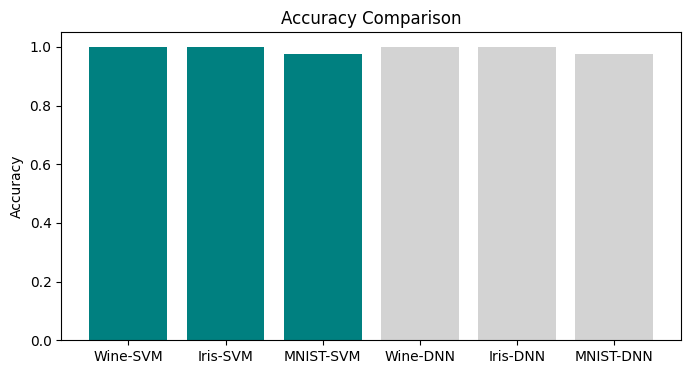

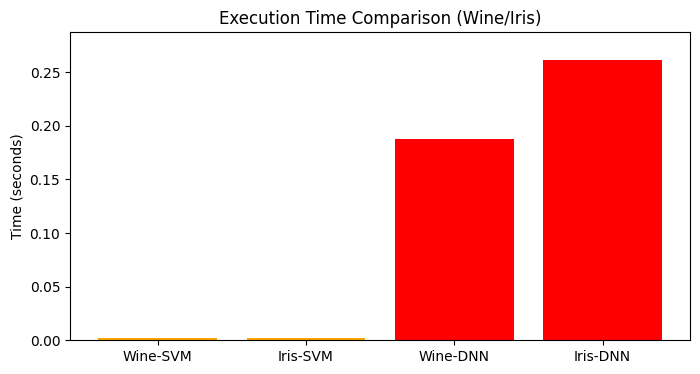

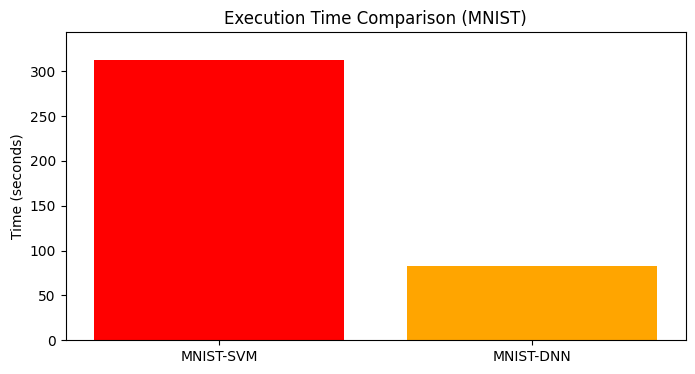

In [ ]:
import matplotlib.pyplot as plt

# Function to plot comparison bar chart
def plot_comparison_bar_chart(values, labels, title, ylabel, colors, ylim=None):
    plt.figure(figsize=(8, 4))
    plt.bar(labels, values, color=colors)
    plt.title(title)
    plt.ylabel(ylabel)
    if ylim:
        plt.ylim(ylim)
    plt.show()

max_execution_time_wine_iris = max(max(execution_time_svm[:2]), max(execution_time_nn[:2]))
upper_limit_wine_iris = max_execution_time_wine_iris * 1.1  # 10% higher than the max for some headroom

max_execution_time_mnist = max(max(execution_time_svm[2:]), max(execution_time_nn[2:]))
upper_limit_mnist = max_execution_time_mnist * 1.1  # 10% higher than the max for some headroom

# Accuracy values for each model on each dataset
accuracy_svm = [accuracy_score(y_test_wine, svm_pred_wine), accuracy_score(y_test_iris, svm_pred_iris), accuracy_score(y_test_mnist, svm_pred_mnist)]
accuracy_nn = [accuracy_score(y_test_wine, nn_pred_wine), accuracy_score(y_test_iris, nn_pred_iris), accuracy_score(y_test_mnist, nn_pred_mnist)]

# Execution time values for each model on each dataset
execution_time_svm = [svm_execution_time_wine, svm_execution_time_iris, svm_execution_time_mnist]
execution_time_nn = [nn_execution_time_wine, nn_execution_time_iris, nn_execution_time_mnist]

# Plot accuracy comparison
plot_comparison_bar_chart(accuracy_svm + accuracy_nn, ['Wine-SVM', 'Iris-SVM', 'MNIST-SVM', 'Wine-DNN', 'Iris-DNN', 'MNIST-DNN'], 'Accuracy Comparison', 'Accuracy', ['teal', 'teal', 'teal', 'lightgray', 'lightgray', 'lightgray'])

# Plot execution time comparison for Wine/Iris
plot_comparison_bar_chart(execution_time_svm[:2] + execution_time_nn[:2], ['Wine-SVM', 'Iris-SVM', 'Wine-DNN', 'Iris-DNN'], 'Execution Time Comparison (Wine/Iris)', 'Time (seconds)', ['orange', 'orange', 'red', 'red'], ylim=(0, upper_limit_wine_iris))

# Plot execution time comparison for MNIST
plot_comparison_bar_chart(execution_time_svm[2:] + execution_time_nn[2:], ['MNIST-SVM', 'MNIST-DNN'], 'Execution Time Comparison (MNIST)', 'Time (seconds)', ['red', 'orange'], ylim=(0, upper_limit_mnist))


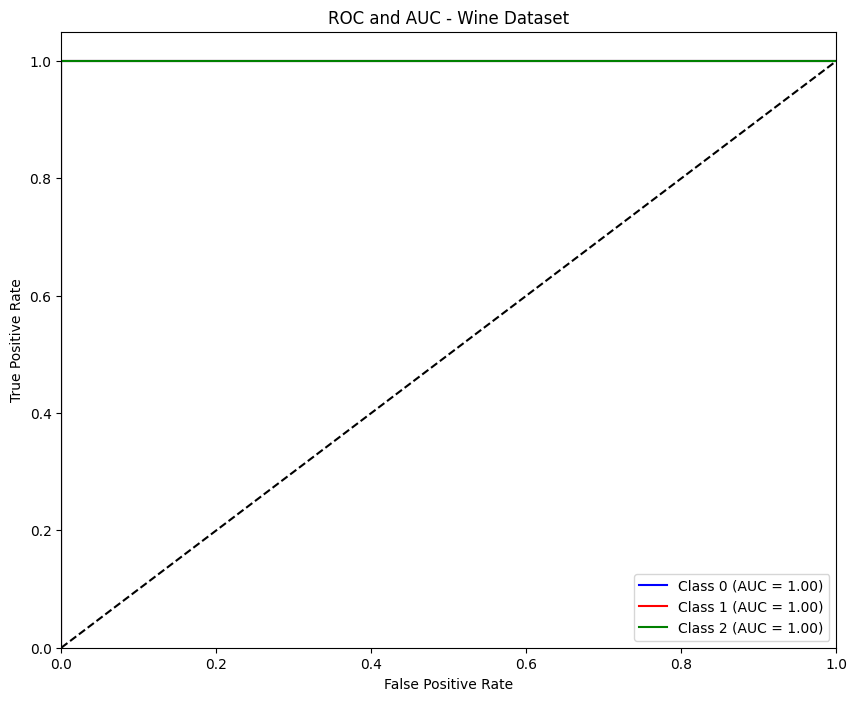

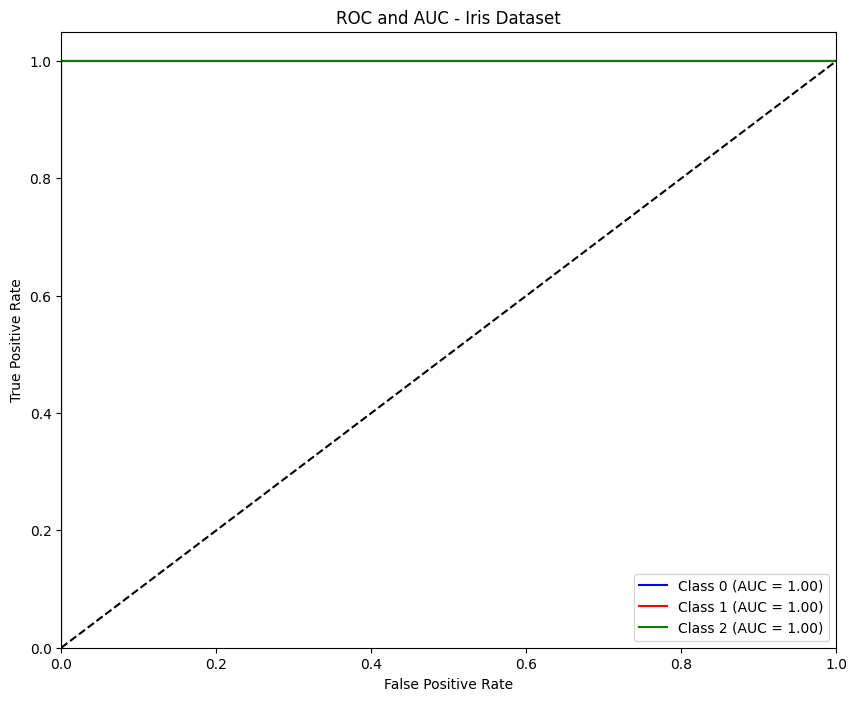

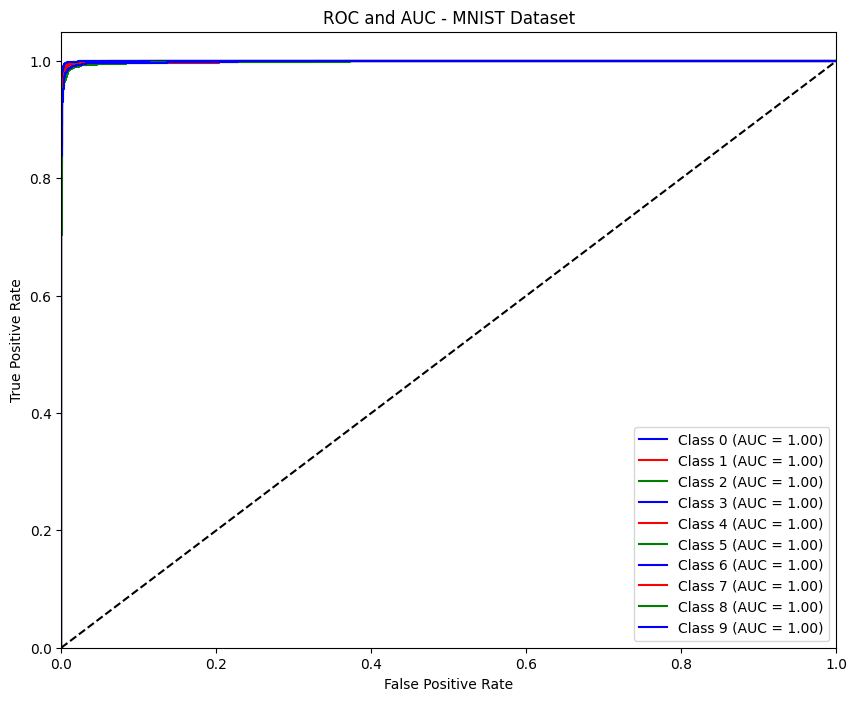

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Function to plot ROC curves and compute AUC for multi-class classification
def plot_multiclass_roc_auc(model, X_test, y_test, n_classes, dataset_name):
    y_test_binarized = label_binarize(y_test, classes=range(n_classes))

    plt.figure(figsize=(10, 8))
    colors = cycle(['blue', 'red', 'green'])

    y_score = model.predict_proba(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot all ROC curves
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:0.2f})', color=color)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC and AUC - {dataset_name} Dataset')
    plt.legend(loc="lower right")
    plt.show()

# Example usage for Wine dataset with Neural Network (DNN) model
plot_multiclass_roc_auc(nn_model_wine, X_test_wine, y_test_wine, n_classes=len(wine.target_names), dataset_name='Wine')

# Example usage for Iris dataset with Neural Network (DNN) model
plot_multiclass_roc_auc(nn_model_iris, X_test_iris, y_test_iris, n_classes=len(iris.target_names), dataset_name='Iris')

# Example usage for MNIST dataset with Neural Network (DNN) model
plot_multiclass_roc_auc(nn_model_mnist, X_test_mnist, y_test_mnist, n_classes=10, dataset_name='MNIST')


## Hyperparameter tuning for margin C, kernel, degree and gamma

C (Margin parameter):

**C** is the regularization parameter that controls the *trade-off* between *maximizing the margin* and *minimizing the classification error*.
Smaller values of C result in a wider margin but may allow some misclassification of training points (a more tolerant model to errors).
Larger values of C result in a narrower margin but aim to minimize misclassification (a stricter model).
You can think of C as the inverse of regularization strength. **Smaller C values encourage a simpler model, and larger C values encourage a more complex model that fits the training data more closely**.


**Kernel**:

The **kernel** is a function that computes the similarity (or inner product) between pairs of data points in a transformed feature space.
SVMs can use different types of kernels to map the original data into a higher-dimensional space, where the data becomes more separable. Common kernels include:
**Linear kernel**: Suitable for linearly separable data.
**Polynomial kernel**: Suitable for data with nonlinear relationships, controlled by the 'degree' hyperparameter.
**Radial Basis Function (RBF) kernel** (or Gaussian kernel): Suitable for complex, nonlinear data with multiple decision boundaries, controlled by the 'gamma' hyperparameter.


**Degree** (for Polynomial Kernel):

The 'degree' hyperparameter is used when the kernel is set to 'poly' (polynomial kernel).
It specifies the degree of the polynomial used in the kernel function. For example, if 'degree' is set to 2, the kernel function would be quadratic.
Gamma (σ for RBF Kernel):

The **gamma** hyperparameter is used when the kernel is set to 'rbf' (Radial Basis Function) or 'sigmoid'.
It determines the shape of the decision boundary. Higher values of gamma result in a more complex, tightly fit decision boundary.
Lower values of gamma make the decision boundary more smooth and can lead to underfitting.
It controls the influence of a single training example; a small gamma means "far" and a large gamma means "close."

These hyperparameters allow you to customize the behavior and complexity of the SVM model, making it suitable for various types of data and classification tasks. Selecting appropriate values for these hyperparameters is often done through hyperparameter tuning techniques like Grid Search or Random Search to find the best combination for a given problem.

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Wine - SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Iris - SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

MNIST - SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        94
           1       0.96   

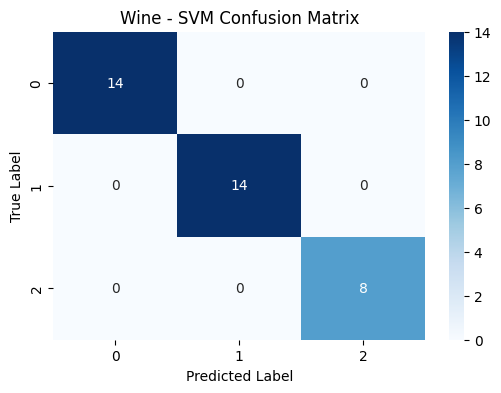

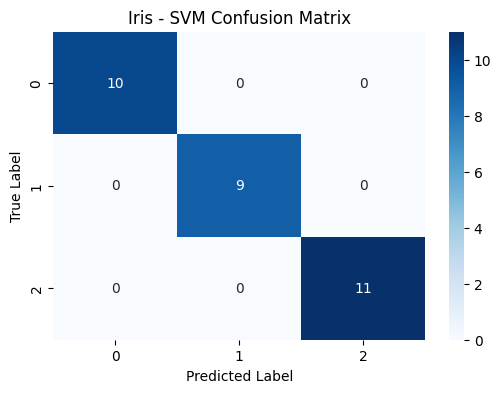

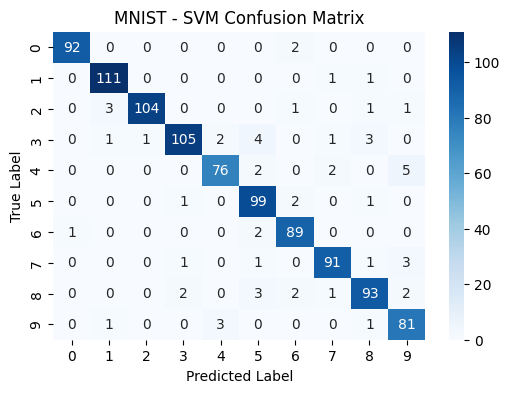

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine, load_iris, fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Load Wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

# Load Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Function to load and preprocess a smaller MNIST dataset
def load_small_mnist():
    mnist = fetch_openml('mnist_784', version=1)
    # Sample a smaller subset for faster processing
    sample_size = 5000  # You can adjust this size as needed
    mnist_sample = mnist.data.sample(sample_size, random_state=42)
    X = mnist_sample.astype('float32') / 255.0
    y = mnist.target.loc[mnist_sample.index].astype('int64')
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Split the datasets into training and testing sets
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)
X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = load_small_mnist()

# Standardize the data
scaler_wine = StandardScaler()
X_train_wine = scaler_wine.fit_transform(X_train_wine)
X_test_wine = scaler_wine.transform(X_test_wine)

scaler_iris = StandardScaler()
X_train_iris = scaler_iris.fit_transform(X_train_iris)
X_test_iris = scaler_iris.transform(X_test_iris)

scaler_mnist = StandardScaler()
X_train_mnist = scaler_mnist.fit_transform(X_train_mnist)
X_test_mnist = scaler_mnist.transform(X_test_mnist)

# Define parameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto'] + [0.1, 1, 10],
}

# Create an SVM classifier
svm_model_wine = SVC()
svm_model_iris = SVC()
svm_model_mnist = SVC()

# Perform Grid Search with cross-validation
grid_search_wine = GridSearchCV(svm_model_wine, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_wine.fit(X_train_wine, y_train_wine)

grid_search_iris = GridSearchCV(svm_model_iris, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_iris.fit(X_train_iris, y_train_iris)

grid_search_mnist = GridSearchCV(svm_model_mnist, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_mnist.fit(X_train_mnist, y_train_mnist)

# Train the SVM model with the best hyperparameters
best_svm_model_wine = SVC(**grid_search_wine.best_params_)
best_svm_model_wine.fit(X_train_wine, y_train_wine)
svm_pred_wine = best_svm_model_wine.predict(X_test_wine)

best_svm_model_iris = SVC(**grid_search_iris.best_params_)
best_svm_model_iris.fit(X_train_iris, y_train_iris)
svm_pred_iris = best_svm_model_iris.predict(X_test_iris)

best_svm_model_mnist = SVC(**grid_search_mnist.best_params_)
best_svm_model_mnist.fit(X_train_mnist, y_train_mnist)
svm_pred_mnist = best_svm_model_mnist.predict(X_test_mnist)

# Print classification report
print("Wine - SVM Classification Report:")
print(classification_report(y_test_wine, svm_pred_wine))

print("Iris - SVM Classification Report:")
print(classification_report(y_test_iris, svm_pred_iris))

print("MNIST - SVM Classification Report:")
print(classification_report(y_test_mnist, svm_pred_mnist))

# Plot confusion matrix
plot_confusion_matrix(y_test_wine, svm_pred_wine, "Wine - SVM Confusion Matrix")
plot_confusion_matrix(y_test_iris, svm_pred_iris, "Iris - SVM Confusion Matrix")
plot_confusion_matrix(y_test_mnist, svm_pred_mnist, "MNIST - SVM Confusion Matrix")


### MNIST - full dataset

Best hyperparameters for Wine:
{'C': 0.01, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Wine - SVM Classification Report with Best Hyperparameters:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



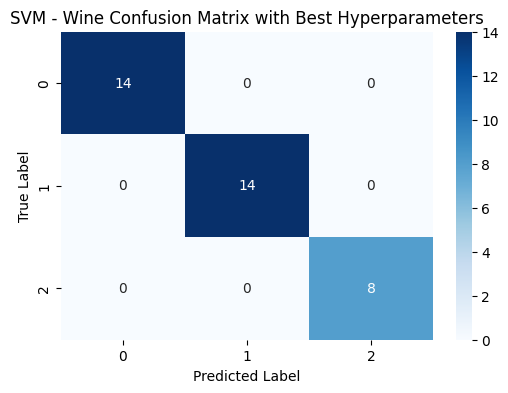

Best hyperparameters for Iris:
{'C': 100, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
Iris - SVM Classification Report with Best Hyperparameters:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



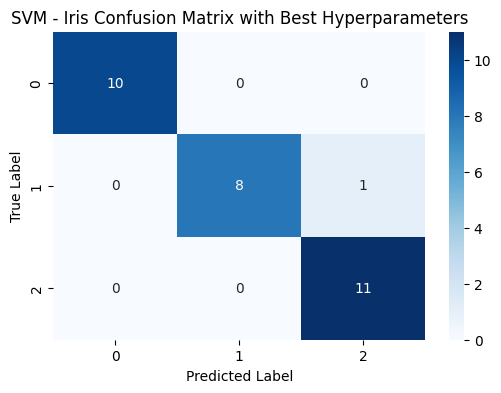

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Function to load and preprocess MNIST dataset
def load_mnist():
    mnist = fetch_openml('mnist_784', version=1)
    X = mnist.data.astype('float32') / 255.0
    y = mnist.target.astype('int64')
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Load Wine dataset
wine = datasets.load_wine()
X_wine = wine.data
y_wine = wine.target

# Split the data into training and testing sets
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

# Standardize the data
scaler_wine = StandardScaler()
X_train_wine = scaler_wine.fit_transform(X_train_wine)
X_test_wine = scaler_wine.transform(X_test_wine)

# Define a larger parameter grid for Grid Search for Wine dataset
param_grid_wine = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1, 10],
}

# Create an SVM classifier for Wine dataset
svm_model_wine = SVC()

# Perform Grid Search with cross-validation for Wine dataset
grid_search_wine = GridSearchCV(svm_model_wine, param_grid_wine, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_wine.fit(X_train_wine, y_train_wine)

# Get the best hyperparameters from the search for Wine dataset
best_params_wine = grid_search_wine.best_params_
print("Best hyperparameters for Wine:")
print(best_params_wine)

# Train the SVM model with the best hyperparameters for Wine dataset
best_svm_model_wine = SVC(**best_params_wine)
best_svm_model_wine.fit(X_train_wine, y_train_wine)
svm_pred_wine = best_svm_model_wine.predict(X_test_wine)

# Print classification report for Wine dataset with the best hyperparameters
print("Wine - SVM Classification Report with Best Hyperparameters:")
print(classification_report(y_test_wine, svm_pred_wine))

# Plot confusion matrix for Wine dataset with the best hyperparameters
plot_confusion_matrix(y_test_wine, svm_pred_wine, "SVM - Wine Confusion Matrix with Best Hyperparameters")

# Load Iris dataset
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

# Split the data into training and testing sets for Iris dataset
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Standardize the data for Iris dataset
scaler_iris = StandardScaler()
X_train_iris = scaler_iris.fit_transform(X_train_iris)
X_test_iris = scaler_iris.transform(X_test_iris)

# Define a larger parameter grid for Grid Search for Iris dataset
param_grid_iris = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1, 10],
}

# Create an SVM classifier for Iris dataset
svm_model_iris = SVC()

# Perform Grid Search with cross-validation for Iris dataset
grid_search_iris = GridSearchCV(svm_model_iris, param_grid_iris, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_iris.fit(X_train_iris, y_train_iris)

# Get the best hyperparameters from the search for Iris dataset
best_params_iris = grid_search_iris.best_params_
print("Best hyperparameters for Iris:")
print(best_params_iris)

# Train the SVM model with the best hyperparameters for Iris dataset
best_svm_model_iris = SVC(**best_params_iris)
best_svm_model_iris.fit(X_train_iris, y_train_iris)
svm_pred_iris = best_svm_model_iris.predict(X_test_iris)

# Print classification report for Iris dataset with the best hyperparameters
print("Iris - SVM Classification Report with Best Hyperparameters:")
print(classification_report(y_test_iris, svm_pred_iris))

# Plot confusion matrix for Iris dataset with the best hyperparameters
plot_confusion_matrix(y_test_iris, svm_pred_iris, "SVM - Iris Confusion Matrix with Best Hyperparameters")

# Load reduced MNIST dataset
X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = load_mnist()

# Define a larger parameter grid for Grid Search for MNIST dataset
param_grid_mnist = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto'] + [0.1, 1, 10],
}

# Create an SVM classifier for MNIST dataset
svm_model_mnist = SVC()

# Perform Grid Search with cross-validation for MNIST dataset
grid_search_mnist = GridSearchCV(svm_model_mnist, param_grid_mnist, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_mnist.fit(X_train_mnist, y_train_mnist)

# Get the best hyperparameters from the search for MNIST dataset
best_params_mnist = grid_search_mnist.best_params_
print("Best hyperparameters for MNIST:")
print(best_params_mnist)

# Train the SVM model with the best hyperparameters for MNIST dataset
best_svm_model_mnist = SVC(**best_params_mnist)
best_svm_model_mnist.fit(X_train_mnist, y_train_mnist)
svm_pred_mnist = best_svm_model_mnist.predict(X_test_mnist)

# Print classification report for MNIST dataset with the best hyperparameters
print("MNIST - SVM Classification Report with Best Hyperparameters:")
print(classification_report(y_test_mnist, svm_pred_mnist))

# Plot confusion matrix for MNIST dataset with the best hyperparameters
plot_confusion_matrix(y_test_mnist, svm_pred_mnist, "SVM - MNIST Confusion Matrix with Best Hyperparameters")
